In [1]:
import os
import pylab as pl
import pandas as pd
import numpy as np
from datetime import datetime as dt
from scipy import stats
import statsmodels.formula.api as smf
import bokeh
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
!wget https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_16v2%20.zip
    
cmd = "mv nyc_pluto_16v2%20.zip" + os.getenv("PUIDATA")

print(cmd)

os.system(cmd)

--2017-11-12 13:23:43--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_16v2%20.zip
Resolving www1.nyc.gov... 23.66.229.194, 2600:1400:a:1a3::1500, 2600:1400:a:18f::1500
Connecting to www1.nyc.gov|23.66.229.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50630337 (48M) [application/zip]
Saving to: “nyc_pluto_16v2 .zip.4”

100%[======================================>] 50,630,337  39.7M/s   in 1.2s    

2017-11-12 13:23:44 (39.7 MB/s) - “nyc_pluto_16v2 .zip.4” saved [50630337/50630337]

mv nyc_pluto_16v2%20.zip/home/cusp/jtl417/PUIdata


256

In [ ]:
!unzip -d $PUIDATA nyc_pluto_16v2\ .zip

In [3]:
bk = pd.read_csv(os.getenv("PUIDATA") + "/BORO_zip_files_csv/BK.csv")

bx = pd.read_csv(os.getenv("PUIDATA") + "/BORO_zip_files_csv/BX.csv")

mn = pd.read_csv(os.getenv("PUIDATA") + "/BORO_zip_files_csv/MN.csv")

qn = pd.read_csv(os.getenv("PUIDATA") + "/BORO_zip_files_csv/QN.csv")

si = pd.read_csv(os.getenv("PUIDATA") + "/BORO_zip_files_csv/SI.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (18,19,21,22,23,24,25,63,64,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (18,19,21,22,63,64,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: Dt

In [4]:
pluto = bk
pluto = pluto.append(mn)
pluto = pluto.append(bx)
pluto = pluto.append(si)
pluto = pluto.append(qn)

In [5]:
pluto_clean = pluto.drop(["Block", "Lot", 'CT2010', "CB2010", 'Address', 'OwnerName', 'BBL', 'CondoNo', 'Tract2010',\
                          'XCoord','YCoord', 'ZMCode', 'Sanbord', 'TaxMap', 'EDesigNum', 'APPBBL', 'APPDate', \
                          'PLUTOMapID', 'Version'])

In [6]:
pluto_clean.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoo

In [7]:
test = pluto_clean.groupby('CD').sum().reset_index()

In [8]:
test1 = pluto_clean.groupby('CD').median().reset_index()

In [9]:
test = test[['CD', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea']]

test1 = test1[['CD', 'AssessTot']]

In [10]:
merge = test.merge(test1, on = 'CD')

In [11]:
merge.head()

merge_clean = merge[merge.AssessTot < 1e7]

In [12]:
lm1 = smf.ols(formula = 'AssessTot ~ BldgArea - 1', data = merge_clean).fit()
lm2 = smf.ols(formula = 'AssessTot ~ ComArea - 1', data = merge_clean).fit()
lm3 = smf.ols(formula = 'AssessTot ~ ResArea - 1', data = merge_clean).fit()
lm4 = smf.ols(formula = 'AssessTot ~ OfficeArea - 1', data = merge_clean).fit()
lm5 = smf.ols(formula = 'AssessTot ~ RetailArea - 1', data = merge_clean).fit()

Text(0.5,0,'Retail Building Area (sf per Community District)')

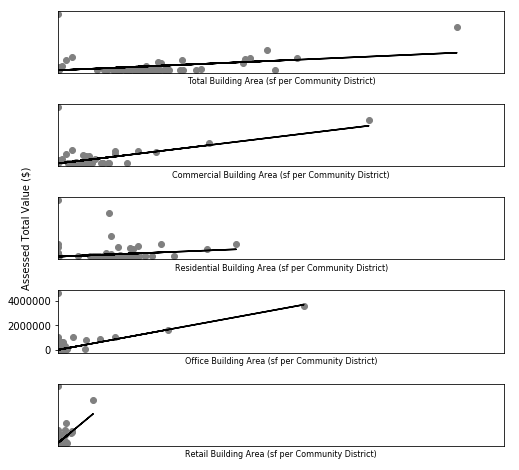

In [26]:
#fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(8,8))
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(hspace=.5)

ax = fig.add_subplot(111)    # The big subplot
ax0 = fig.add_subplot(511)
ax1 = fig.add_subplot(512)
ax2 = fig.add_subplot(513)
ax3 = fig.add_subplot(514)
ax4 = fig.add_subplot(515)

ax.set_ylabel("Assessed Total Value ($)")
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')


ax0.scatter(merge_clean.BldgArea, merge_clean.AssessTot, color = '.5')
ax0.plot(merge_clean.BldgArea, lm1.predict(),'-', color = '0')
ax0.set_xlim([0,.4e9])
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_facecolor('white')
#ax0.set_title("Assessed Total Value vs. Total Building Area (per Community District)", fontsize=10)
#ax0.set_ylabel("Assessed Total Value ($)", fontsize = 8)
ax0.set_xlabel('Total Building Area (sf per Community District)', fontsize = 8)


ax1.scatter(merge_clean.ComArea, merge_clean.AssessTot, color = '.5')
ax1.plot(merge_clean.ComArea, lm2.predict(),'-', color = '0')
ax1.set_xlim([0,.4e9])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_facecolor('white')
#ax1.set_ylabel("Assessed Total Value ($)", fontsize = 8)
ax1.set_xlabel('Commercial Building Area (sf per Community District)', fontsize = 8)
#ax1.set_title("Assessed Total Value vs. Commercial Building Area (per Community District)", fontsize=10)




ax2.scatter(merge_clean.ResArea, merge_clean.AssessTot, color = '.5')
ax2.plot(merge_clean.ResArea, lm3.predict(),'-', color = '0')
ax2.set_xlim([0,.4e9])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_facecolor('white')
#ax2.set_title("Assessed Total Value vs. Residential Building Area (per Community District)", fontsize=10)
ax2.set_xlabel('Residential Building Area (sf per Community District)', fontsize = 8)



ax3.scatter(merge_clean.OfficeArea, merge_clean.AssessTot, color = '.5')
ax3.plot(merge_clean.OfficeArea, lm4.predict(),'-', color = '0')
ax3.set_xlim([0,.4e9])
ax3.set_xticks([])
#ax3.set_yticks([])
ax3.set_facecolor('white')
#ax3.set_title("Assessed Total Value vs. Office Building Area (per Community District)", fontsize=10)
ax3.set_xlabel('Office Building Area (sf per Community District)', fontsize = 8)



ax4.scatter(merge_clean.RetailArea, merge_clean.AssessTot, color = '.5')
ax4.plot(merge_clean.RetailArea, lm5.predict(),'-', color = '0')
ax4.set_xlim([0,.4e9])
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_facecolor('white')
#ax4.set_title("Assessed Total Value vs. Retail Building Area (per Community District)", fontsize=10)
ax4.set_xlabel('Retail Building Area (sf per Community District)', fontsize = 8)
